---



---

# **Trabalho II** - Atividade Prática

---



---

# **Tópico I:** CNN

Observe o código abaixo da arquitetura SVM, este código executa a classificação da base de dados MNIST. Note que, ao empregar um pré-processamento dos dados, necessitamos de apenas 25 componentes principais para obter uma acurácia de 98,33%.

In [1]:
# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import time
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.layers import Conv2D, Flatten, Dense, Dropout
from keras.layers import MaxPooling2D
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow import keras

# Carregando o conjunto de dados MNIST manualmente
from tensorflow.keras.datasets import mnist

In [2]:
(X, y), (_, _) = mnist.load_data()

# Redimensionando e normalizando os dados
X = X.reshape(-1, 784) / 255.0

# Dividindo o conjunto de dados em treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicando PCA para redução de dimensionalidade
n_components = 25  # Número de componentes principais
pca = PCA(n_components=n_components, random_state=42)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Treinando um classificador SVM
svm = SVC(kernel='rbf', C=10)

st = time.time()
svm.fit(x_train_pca, y_train)
et = time.time()
tempo_decorrido = et - st


# Fazendo previsões no conjunto de teste
y_pred = svm.predict(x_test_pca)

# Calculando a acurácia do classificador
accuracy = accuracy_score(y_test, y_pred)
print(' ')

print(f'Acurácia do SVM junto aos dados de teste: {accuracy:.4f}')

11490434/11490434 [==============================] - 2s 0us/step
 
Acurácia do SVM junto aos dados de teste: 0.9833




---


## **Agora é sua vez:**

1. Proponha uma estrutura de CNN capaz de superar a acurácia obtida via SVM, junto aos dados de teste;
2. Salve, no diretório, seu modelo proposto.

---

In [3]:
# Complete com seu código
(X, y), (_, _) = mnist.load_data()
X = X.reshape(-1, 28, 28, 1) / 255.0

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Treinando um classificador SVM
model = tf.keras.models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
st = time.time()
model.fit(x_train, y_train, epochs=5, validation_split=0.2)
et = time.time()
tempo_decorrido = et - st

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(' ')
print(f'Acurácia do CNN junto aos dados de teste: {test_accuracy:.4f}')

Epoch 1/5
1200/1200 [==============================] - 16s 5ms/step - loss: 0.1843 - accuracy: 0.9451 - val_loss: 0.0753 - val_accuracy: 0.9775
Epoch 2/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0552 - accuracy: 0.9824 - val_loss: 0.0443 - val_accuracy: 0.9861
Epoch 3/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0379 - accuracy: 0.9876 - val_loss: 0.0488 - val_accuracy: 0.9857
Epoch 4/5
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0261 - accuracy: 0.9920 - val_loss: 0.0511 - val_accuracy: 0.9844
Epoch 5/5
375/375 [==============================] - 1s 2ms/step - loss: 0.0505 - accuracy: 0.9846
 
Acurácia do CNN junto aos dados de teste: 0.9846


In [4]:
# Salvar modelo
model.save("model_A.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(




---



---


# **Tópico II - Transfer Learning:**

Transfer Learning (TL) é uma técnica de aprendizado de máquina onde um modelo pré-treinado em um conjunto de dados é usado como ponto de partida para resolver outra tarefa relacionada. Em vez de treinar um modelo do zero, transferimos o conhecimento adquirido pelo modelo pré-treinado para melhorar o desempenho em uma tarefa específica. Isso economiza tempo e recursos de treinamento, pois o modelo já aprendeu características gerais úteis em sua tarefa anterior e pode adaptá-las para a nova tarefa, tornando-a mais eficiente e eficaz.

---

## **Agora é sua vez:**

Aplique a técnica Transfer Learning (TL) para a versão binária do problema de classificação MNIST. Note que, o problema do tópico I possuía 10 classes. No entanto, para o tópico II, você terá que converter o problema do tópico I para um problema binário e resolver esse problema binário via TL.

1. Carregue seu modelo (salvo no tópico I) capaz de executar a classificação multiclasse para a base de dados MNIST;

2. Faça alterações necessárias de forma que seja possível resolver a versão binária de classificação para a base de dados MNIST (classe 0 para digitos de 0 a 4, classe 1 para digitos de 5 a 9) **via TL**;

3. Obtenha a acurácia do modelo final junto aos dados de teste (neste problema binário).

**Dica:** é possível obter resultados interessantes usando a softMax na versão final do modelo.

---

In [5]:
# Complete com seu código

model_A = keras.models.load_model("model_A.h5")

model_B_on_A = keras.models.Sequential(model_A.layers[:-2])
model_B_on_A.add(Dense(128, activation='relu'))
model_B_on_A.add(Dropout(0.5))
model_B_on_A.add(Dense(64, activation='relu'))
model_B_on_A.add(keras.layers.Dense(1, activation="softmax"))

for layer in model_B_on_A.layers[:-2]:
    layer.trainable = False

model_B_on_A.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# Convertendo o problema em uma classificação binária
y_train_binary = (y_train >= 5).astype('int')  # Classes 0 para digitos de 0 a 4, Classes 1 para digitos de 5 a 9
y_test_binary = (y_test >= 5).astype('int')

history = model_B_on_A.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test))

Epoch 1/2
1500/1500 [==============================] - 8s 4ms/step - loss: -5771.2129 - accuracy: 0.1129 - val_loss: -16946.1113 - val_accuracy: 0.1102
Epoch 2/2
1500/1500 [==============================] - 6s 4ms/step - loss: -36383.1094 - accuracy: 0.1129 - val_loss: -59797.6602 - val_accuracy: 0.1102


In [6]:
model_B_on_A.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 7518.2251 - accuracy: 0.4890
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 5220.1562 - accuracy: 0.4890
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 1127.5914 - accuracy: 0.4890
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 20.7821 - accuracy: 0.4890
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 8.5454 - accuracy: 0.4890
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 1.4784 - accuracy: 0.4890
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6337 - accuracy: 0.4890
Epoch 8/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5272 - accuracy: 0.4890
Epoch 9/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5162 - accuracy: 0.4890
Epoch 10/10
1500/1500 [==============================] - 5s 4ms/step - l

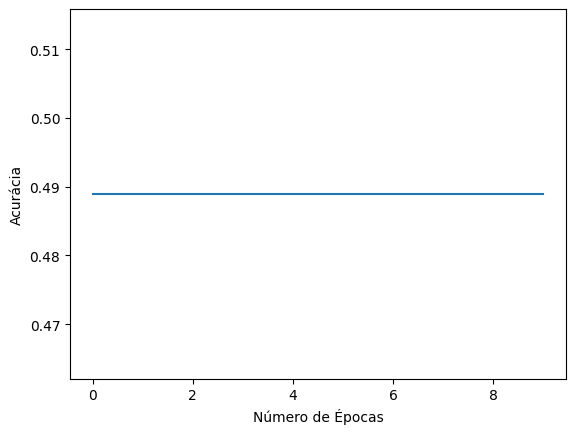

In [7]:
for layer in model_B_on_A.layers[:-2]:
    layer.trainable = True

historico = model_B_on_A.fit(x_train, y_train_binary, epochs = 10)
historico.history.keys()

import matplotlib.pyplot as plt
plt.plot(historico.history['accuracy']);

plt.xlabel("Número de Épocas")
plt.ylabel("Acurácia")

plt.show()

In [8]:
pred = model_B_on_A.predict(x_test)
pred = (pred > 0.5)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test_binary, pred)

print('Acurácia Obtida: ',acc*100)

375/375 [==============================] - 1s 2ms/step
Acurácia Obtida:  49.45




---



---


# **Tópico III:** Autoencoder

Abaixo, dois gráficos representam duas situações: I) Pouca Separabilidade e II) Separabilidade Maximizada entre as classes.

#### I) Pouca Separabilidade Entre as Classes:

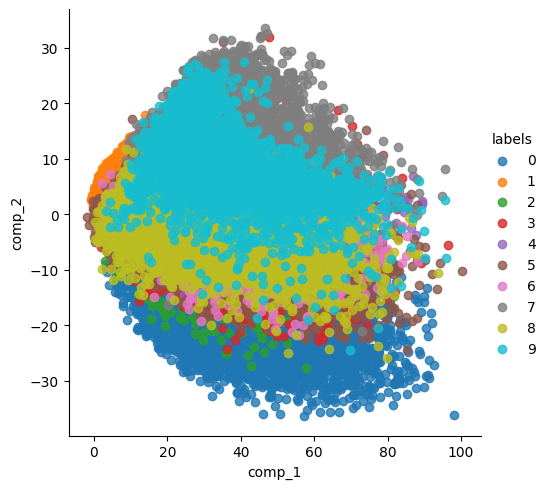


#### II) Separabilidade Maximizada Entre as Classes:

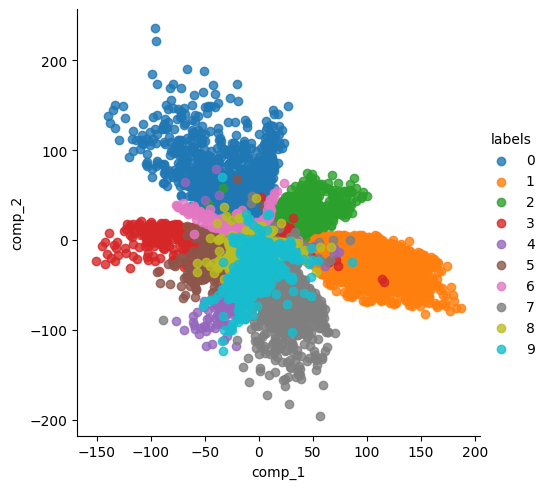

#### O código abaixo apresenta uma estrutura do tipo autoencoder com **pouca separabilidade** entre as classes:

In [ ]:
# Suprime avisos para manter a saída mais limpa.
import warnings
warnings.filterwarnings('ignore')

# Importa as bibliotecas TensorFlow e Keras.
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten

# Carrega o conjunto de dados MNIST.
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# Normaliza os valores dos pixels para o intervalo [0, 1].
x_train, x_test = x_train / 255.0, x_test / 255.0

# Redimensiona as imagens de treinamento para terem a forma original (28x28).
x_images = x_train.reshape(x_train.shape[0], 28, 28)

In [ ]:
# Define uma camada de entrada para a rede neural autoencoder com forma (28, 28, 1).
input_img = Input(shape=(28, 28, 1))

# Camadas de codificação (encoder):
# - A primeira camada densa com 512 unidades e ativação 'tanh'.
encoded = Dense(512, activation='tanh')(input_img)
# - A segunda camada densa com 128 unidades e ativação 'tanh'.
encoded = Dense(128, activation='tanh')(encoded)
# - A terceira camada densa com 32 unidades e ativação 'tanh'.
encoded = Dense(32, activation='tanh')(encoded)

# A camada Flatten 'aplanou' a saída do encoder para uma única dimensão.
encoded = Flatten()(encoded)

# Camadas de decodificação (decoder):
# - A primeira camada densa com 2 unidades (usado para redução de dimensionalidade).
encoded = Dense(2)(encoded)
# - A primeira camada densa com 32 unidades e ativação 'tanh'.
decoded = Dense(32, activation='tanh')(encoded)
# - A segunda camada densa com 128 unidades e ativação 'tanh'.
decoded = Dense(128, activation='tanh')(decoded)
# - A terceira camada densa com 512 unidades e ativação 'tanh'.
decoded = Dense(512, activation='tanh')(decoded)

# A camada de saída com 784 unidades e ativação 'sigmoid' para reconstruir a imagem.
decoded = Dense(784, activation='sigmoid')(decoded)

# Cria o modelo autoencoder que mapeia da entrada para a saída.
autoencoder = Model(inputs=input_img, outputs=decoded)

In [ ]:
# Importa as bibliotecas seaborn (para visualização estatística) e pandas (para manipulação de dados).
import seaborn as sns
import pandas as pd

# Usa o encoder para projetar os dados de treinamento X_train_1 nos componentes latentes.
x_proj = encoder.predict(X_train_1[:60000])

# Exibe a forma do conjunto de dados projetado.
x_proj.shape

# Cria um DataFrame pandas chamado 'proj' para armazenar os componentes latentes.
proj = pd.DataFrame(x_proj)

# Nomeia as colunas do DataFrame como "comp_1" e "comp_2" para representar os componentes latentes.
proj.columns = ["comp_1", "comp_2"]

# Adiciona uma coluna chamada "labels" ao DataFrame para armazenar as etiquetas (rótulos) dos dados.
proj["labels"] = y_train[:60000]

# Cria um gráfico de dispersão (scatter plot) usando seaborn para visualizar os componentes latentes.
sns.lmplot(x="comp_1", y="comp_2", hue="labels", data=proj, fit_reg=False)

NameError: ignored



---

## **Agora é sua vez:**

- Faça alterações na estrutura fornecida (ou proponha uma estrutura autoencoder) de forma que a separabilidade entre as classes, na base de dados MNIST, seja maximizada;

- Plote seu resultado mostrando a separabilidade entre as classes.

---


In [ ]:
# Complete com seu código

#### Plot bidimensional com a separabilidade entre as classes:

In [ ]:
# Complete com seu código